# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns
import scipy.stats as ss

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures


In [2]:
path = "Flubby Flops.csv"

In [3]:
df = pd.read_csv(path,index_col=0,encoding="latin")

# Modifying

In [4]:
df['process_start'] = pd.to_datetime(df['process_start'])
df['boiling_stop'] = pd.to_datetime(df['boiling_stop'])
df['stretch_stop'] = pd.to_datetime(df['stretch_stop'])

In [5]:
df['boiling_time'] = (df['boiling_stop'] - df['process_start'])/ np.timedelta64(1,'s')
df['prossess_time'] = (df['stretch_stop'] - df['process_start'])/ np.timedelta64(1,'s')
df['stretching_time'] = (df['stretch_stop'] - df['boiling_stop'])/ np.timedelta64(1,'s')

In [6]:
df = pd.get_dummies(df,columns=['floppiness'])

In [7]:
df = df.drop(columns=['boiling_stop','process_start','stretch_stop'])

In [8]:
bc, param = ss.boxcox(df['flostard'])

In [9]:
df['flostard'] = bc

# Exploration

In [10]:
df.describe()

,flostard,flüber,lard,flubberiness,boiling_time,prossess_time,stretching_time,floppiness_high,floppiness_low,floppiness_medium
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,-0.367654,20.049308,20016.724590,606852.519863,7472.279635,8938.480243,1466.200608,0.345491,0.327254,0.327254
std,1.007344,1.011363,1004.410839,60565.664762,170.235402,243.281572,170.486871,0.475769,0.469449,0.469449
min,-3.204580,16.498978,16650.781949,359531.427988,7200.000000,8400.000000,1200.000000,0.000000,0.000000,0.000000
25%,-1.019688,19.387500,19352.264961,568901.553551,7320.000000,8760.000000,1320.000000,0.000000,0.000000,0.000000
50%,-0.375277,20.004076,20006.250787,608196.996310,7440.000000,8940.000000,1500.000000,0.000000,0.000000,0.000000
75%,0.297054,20.743244,20702.726846,647757.356231,7620.000000,9120.000000,1620.000000,1.000000,1.000000,1.000000
max,3.181056,23.229651,22980.245305,787358.208602,7740.000000,9480.000000,1740.000000,1.000000,1.000000,1.000000


In [11]:
df.head()

,flostard,flüber,lard,flubberiness,boiling_time,prossess_time,stretching_time,floppiness_high,floppiness_low,floppiness_medium
0,-0.305906,20.667655,19438.097842,596934.441785,7740.0,9360.0,1620.0,1,0,0
1,-0.163991,19.199460,20082.661675,647730.495391,7740.0,9120.0,1380.0,0,1,0
2,-2.265521,20.399001,19184.709928,537041.204320,7380.0,8880.0,1500.0,0,1,0
3,-1.339704,20.363044,18524.828633,588746.939774,7200.0,8460.0,1260.0,0,0,1
4,0.147946,21.362930,21568.106683,542085.676371,7260.0,9000.0,1740.0,0,1,0


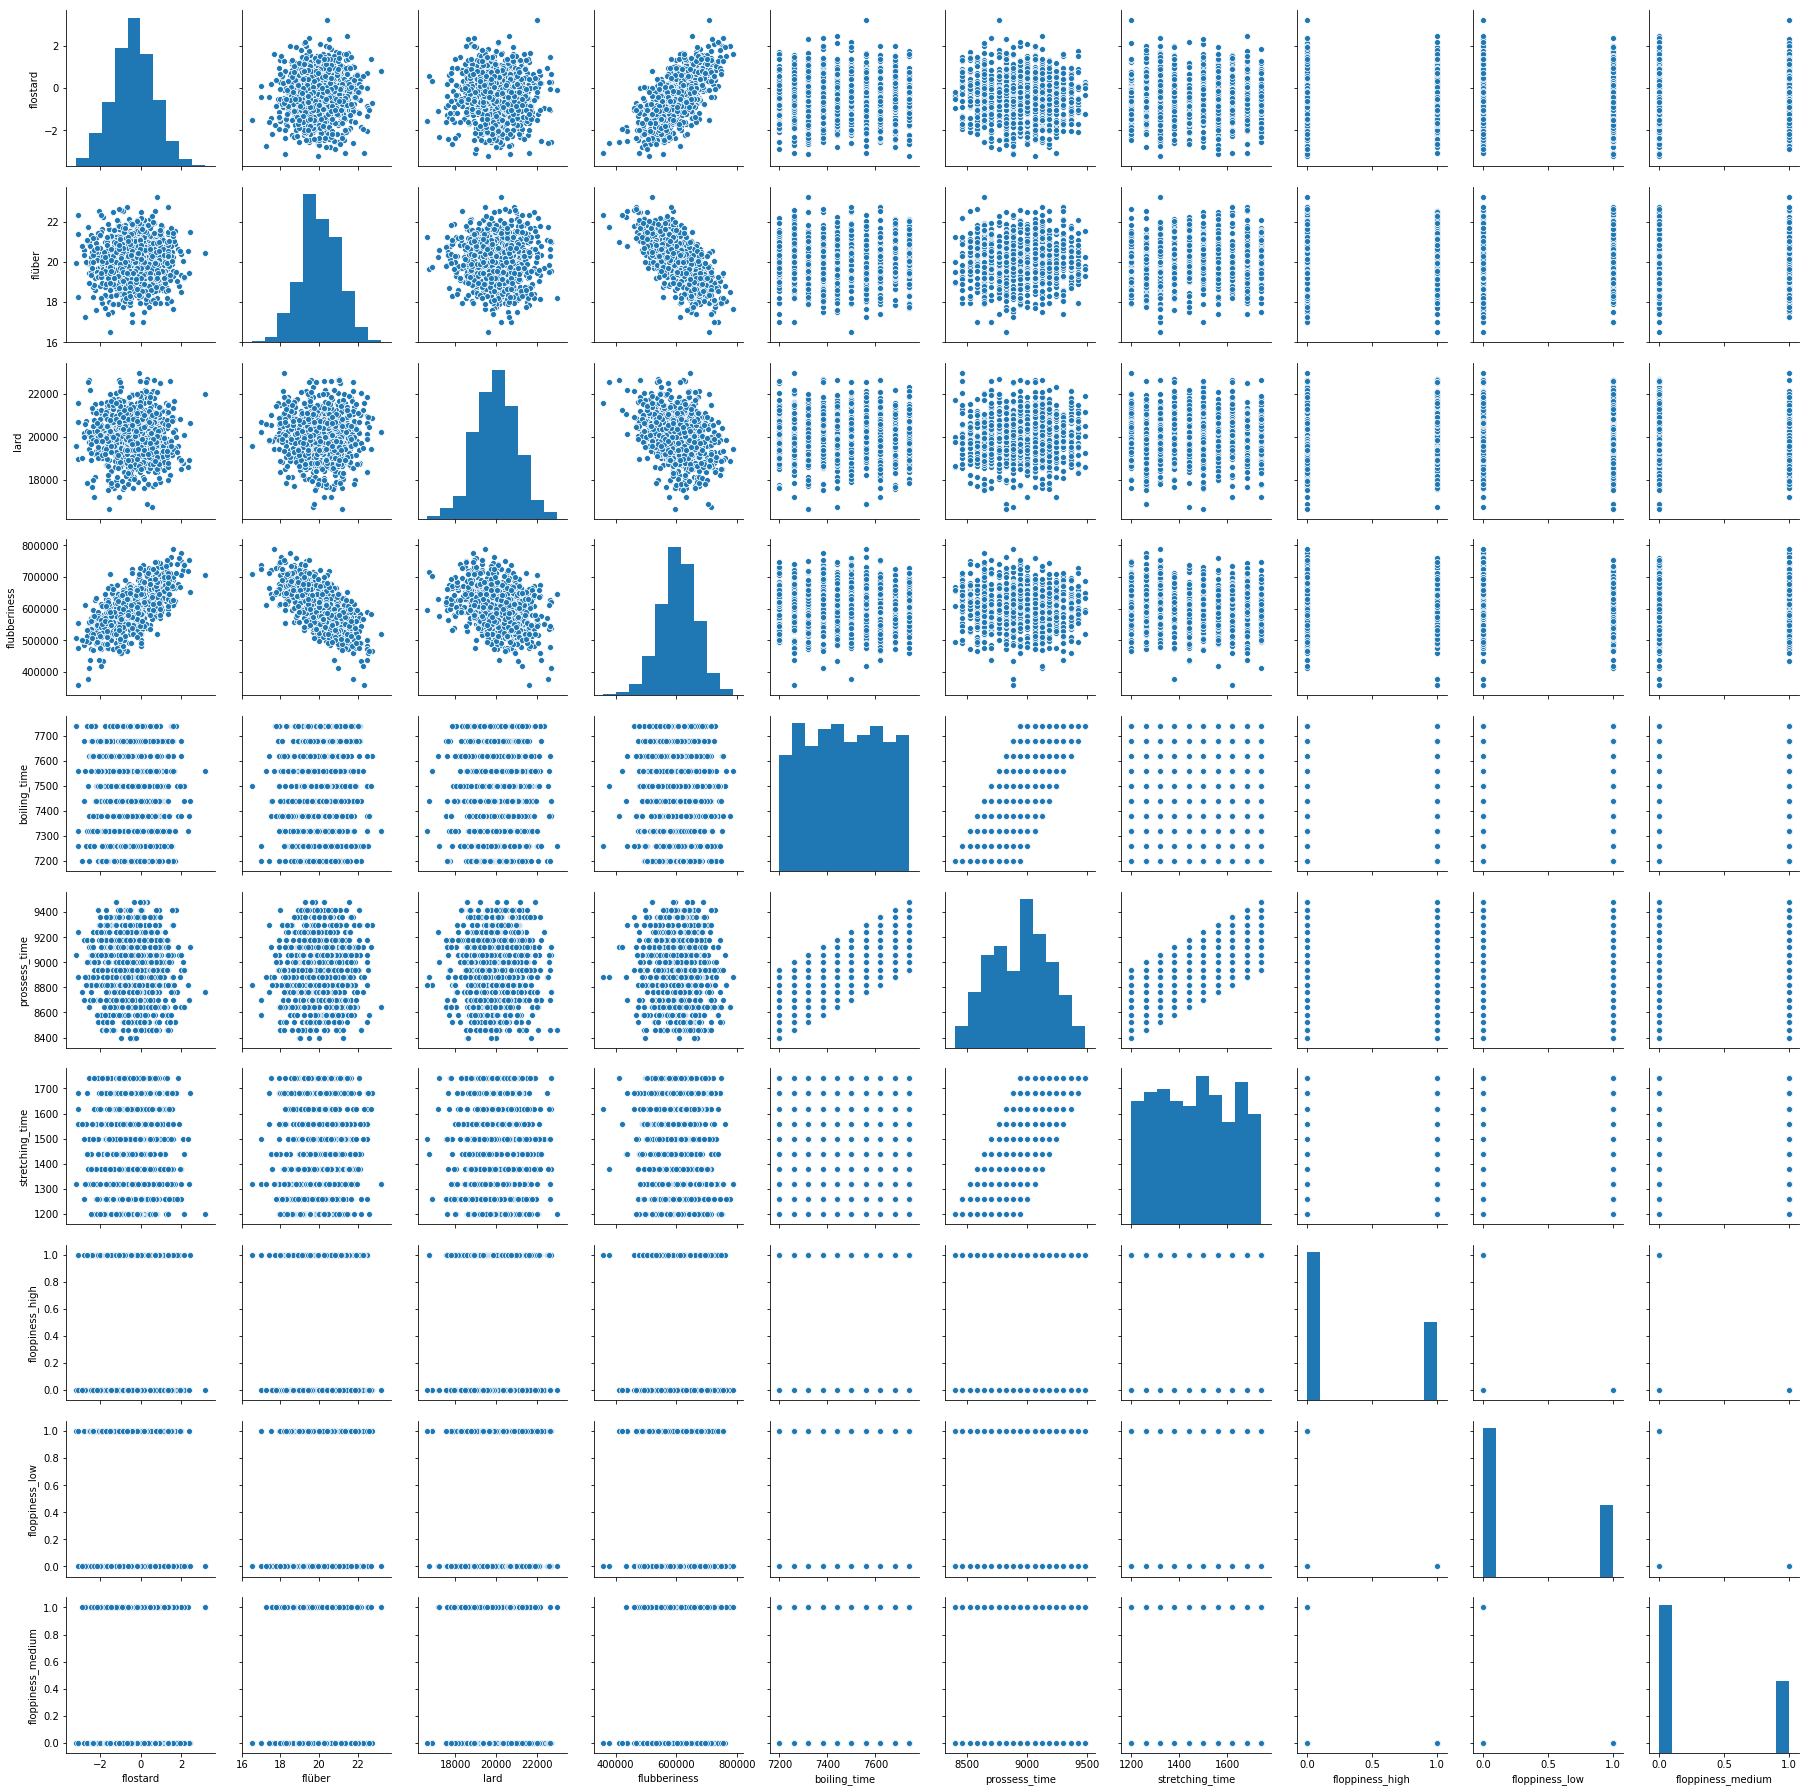

In [55]:
sns.pairplot(df)

# Training

In [12]:
data = df.drop(columns='flubberiness')
names = list(data.columns)
y = df['flubberiness']

In [13]:
poly = PolynomialFeatures(2)
data = poly.fit_transform(data)

In [14]:
int_names = []
for i,cur_name in enumerate(names):
    for rem_name in names[i:]:
        int_names.append(cur_name +'&'+ rem_name)


In [15]:
names.extend(int_names)

In [16]:
LR = LinearRegression()

In [17]:
LR.fit(X=data,y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
predicted = LR.predict(X=data)

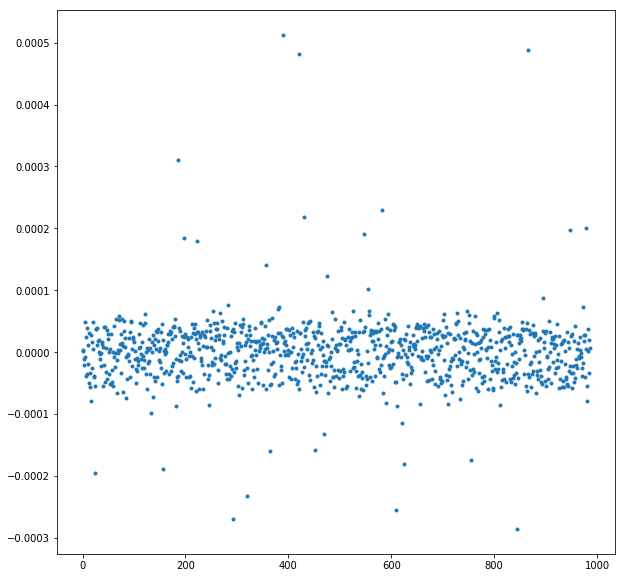

In [19]:
fig = plt.figure(figsize=(10,10))
plt.plot(y-predicted,'.')

In [20]:
LR.score(data,y)

1.0

In [21]:
print('absolutt error is:',np.max(abs(y-predicted)))

absolutt error is: 0.0005126756150275469


In [22]:
n_df = pd.DataFrame(data)

In [23]:
n_df = n_df.drop(columns=0)
n_df.columns = names

In [24]:
n_df.head(1)

,flostard,flüber,lard,boiling_time,prossess_time,stretching_time,floppiness_high,floppiness_low,floppiness_medium,flostard&flostard,...,stretching_time&stretching_time,stretching_time&floppiness_high,stretching_time&floppiness_low,stretching_time&floppiness_medium,floppiness_high&floppiness_high,floppiness_high&floppiness_low,floppiness_high&floppiness_medium,floppiness_low&floppiness_low,floppiness_low&floppiness_medium,floppiness_medium&floppiness_medium
0,-0.305906,20.667655,19438.097842,7740.0,9360.0,1620.0,1.0,0.0,0.0,0.093578,...,2624400.0,1620.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
'flostard&lard','flüber&flüber','flüber&lard','flüber&lard','flostard&lard'

('flostard&lard',
 'flüber&flüber',
 'flüber&lard',
 'flüber&lard',
 'flostard&lard')

In [50]:
names[:9]

['flostard',
 'flüber',
 'lard',
 'boiling_time',
 'prossess_time',
 'stretching_time',
 'floppiness_high',
 'floppiness_low',
 'floppiness_medium']

In [113]:
n_names = names[0:9]

In [114]:
n_names.extend(['flostard&lard','flüber&flüber','flüber&lard'])

In [115]:
n_names

['flostard',
 'flüber',
 'lard',
 'boiling_time',
 'prossess_time',
 'stretching_time',
 'floppiness_high',
 'floppiness_low',
 'floppiness_medium',
 'flostard&lard',
 'flüber&flüber',
 'flüber&lard']

In [116]:
n_data = n_df[n_names]

In [117]:
n_data.head(1)

,flostard,flüber,lard,boiling_time,prossess_time,stretching_time,floppiness_high,floppiness_low,floppiness_medium,flostard&lard,flüber&flüber,flüber&lard
0,-0.305906,20.667655,19438.097842,7740.0,9360.0,1620.0,1.0,0.0,0.0,-5946.223276,427.15197,401739.903171


In [118]:
LR1 = LinearRegression()
LR.fit(X=n_data,y=y)
n_predicted = LR.predict(X=n_data)
print('absolutt error is:',np.max(abs(y-n_predicted)))

absolutt error is: 26.96189261006657
